<a href="https://colab.research.google.com/github/Gobihanath/solar-energy-ml-forecast/blob/main/Solar_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### import dependencies and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'19APC3970_DBMS_Class Assignment 1.zip'
 19APC3970-English.pdf
 19APC3970_FWT_QUIZ02.pdf
'19APC3970 HTML-01 (1).zip'
'19APC3970 HTML-01.zip'
'19APC3970 HTML _1.rar'
 19APC3970.LOG2.docx
 19APC3970.LOG.docx
 19APC3970_QUIZ02.pdf
 19APC3970-Quiz03.pdf
 20240216_091107.jpg
 20240216_091245.jpg
 20240216_091320.jpg
 20240216_095746.jpg
 20240216_170935.jpg
 Abstract
 Abstract.gdoc
 Attendence1.jpg
'Author Declaration Form IRCFoT-2025_V2.docx'
'Balancing Academic and Non-Academic Workload: Stress Assessment .gform'
'Balancing Academic and Non-Academic Workload: Stress Assessment  (Responses).gsheet'
 Banana1.jpg
 Banana2.jpg
 BI-Report.gdoc
'CamScanner 08-26-2022 13.34.jpg'
'CamScanner 11-05-2021 11.58_1.pdf'
'CamScanner 11-05-2021 11.58.pdf'
'Capstone Project - Group 22'
 CIS
 Classroom
'Colab 

In [ ]:
%cd /mydrive/Dataset/

/content/gdrive/My Drive/Dataset


In [ ]:
import pandas as pd
df_solar = pd.read_csv("solar_energy.csv")

In [ ]:
df_wind = pd.read_csv("wind-generation.csv")
df_geothermal = pd.read_csv("installed-geothermal-capacity.csv")
df_share_electricity = pd.read_csv("share-electricity-renewables.csv")
df_hydro = pd.read_csv("hydropower-consumption.csv")

In [ ]:
df_solar

,Entity,Code,Year,Solar (% equivalent primary energy)
0,Africa,NaN,1971,0.000000
1,Africa,NaN,1972,0.000000
2,Africa,NaN,1973,0.000000
3,Africa,NaN,1974,0.000000
4,Africa,NaN,1975,0.000000
...,...,...,...,...
5437,World,OWID_WRL,2017,0.753156
5438,World,OWID_WRL,2018,0.942403
5439,World,OWID_WRL,2019,1.137186
5440,World,OWID_WRL,2020,1.418551


In [ ]:
df_hydro

,Entity,Code,Year,Electricity from hydro (TWh)
0,Afghanistan,AFG,2000,0.31
1,Afghanistan,AFG,2001,0.50
2,Afghanistan,AFG,2002,0.56
3,Afghanistan,AFG,2003,0.63
4,Afghanistan,AFG,2004,0.56
...,...,...,...,...
8835,Zimbabwe,ZWE,2017,3.97
8836,Zimbabwe,ZWE,2018,5.05
8837,Zimbabwe,ZWE,2019,4.17
8838,Zimbabwe,ZWE,2020,3.81


In [ ]:
df_geothermal

,Entity,Code,Year,Geothermal Capacity
0,Africa,NaN,1990,45.000
1,Africa,NaN,1995,45.000
2,Africa,NaN,2000,65.300
3,Africa,NaN,2001,65.300
4,Africa,NaN,2002,65.300
...,...,...,...,...
753,World,OWID_WRL,2016,12121.594
754,World,OWID_WRL,2017,12680.665
755,World,OWID_WRL,2018,13244.865
756,World,OWID_WRL,2019,13911.665


In [ ]:
df_wind


,Entity,Code,Year,Electricity from wind (TWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0
...,...,...,...,...
8671,Zimbabwe,ZWE,2017,0.0
8672,Zimbabwe,ZWE,2018,0.0
8673,Zimbabwe,ZWE,2019,0.0
8674,Zimbabwe,ZWE,2020,0.0


In [ ]:
# Check the column names in each dataframe
print("Solar:", df_solar.columns)
print("Wind:", df_wind.columns)
print("Geothermal:", df_geothermal.columns)
print("Share Electricity:", df_share_electricity.columns)
print("Hydropower:", df_hydro.columns)


Solar: Index(['Entity', 'Code', 'Year', 'Solar (% equivalent primary energy)'], dtype='object')
Wind: Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)'], dtype='object')
Geothermal: Index(['Entity', 'Code', 'Year', 'Geothermal Capacity'], dtype='object')
Share Electricity: Index(['Entity', 'Code', 'Year', 'Renewables (% electricity)'], dtype='object')
Hydropower: Index(['Entity', 'Code', 'Year', 'Electricity from hydro (TWh)'], dtype='object')


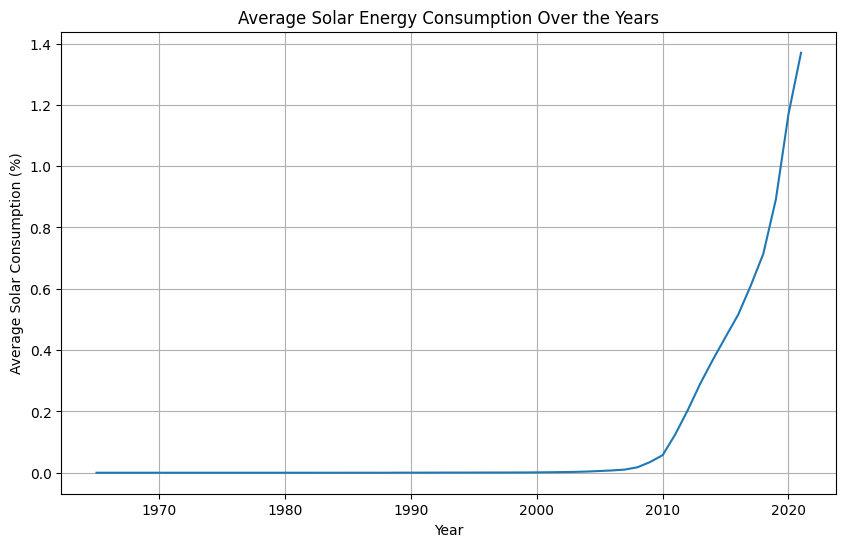

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_solar dataframe
df_solar = pd.read_csv("solar_energy.csv")

# Rename the column for convenience
df_solar.rename(columns={'Solar (% equivalent primary energy)': 'solar'}, inplace=True)

# Group by 'Year' and calculate the average solar consumption
df_solar_avg = df_solar.groupby('Year')['solar'].mean()

# Plot the average solar consumption over the years
plt.figure(figsize=(10, 6))
df_solar_avg.plot(kind='line')
plt.title('Average Solar Energy Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Solar Consumption (%)')
plt.grid(True)
plt.show()



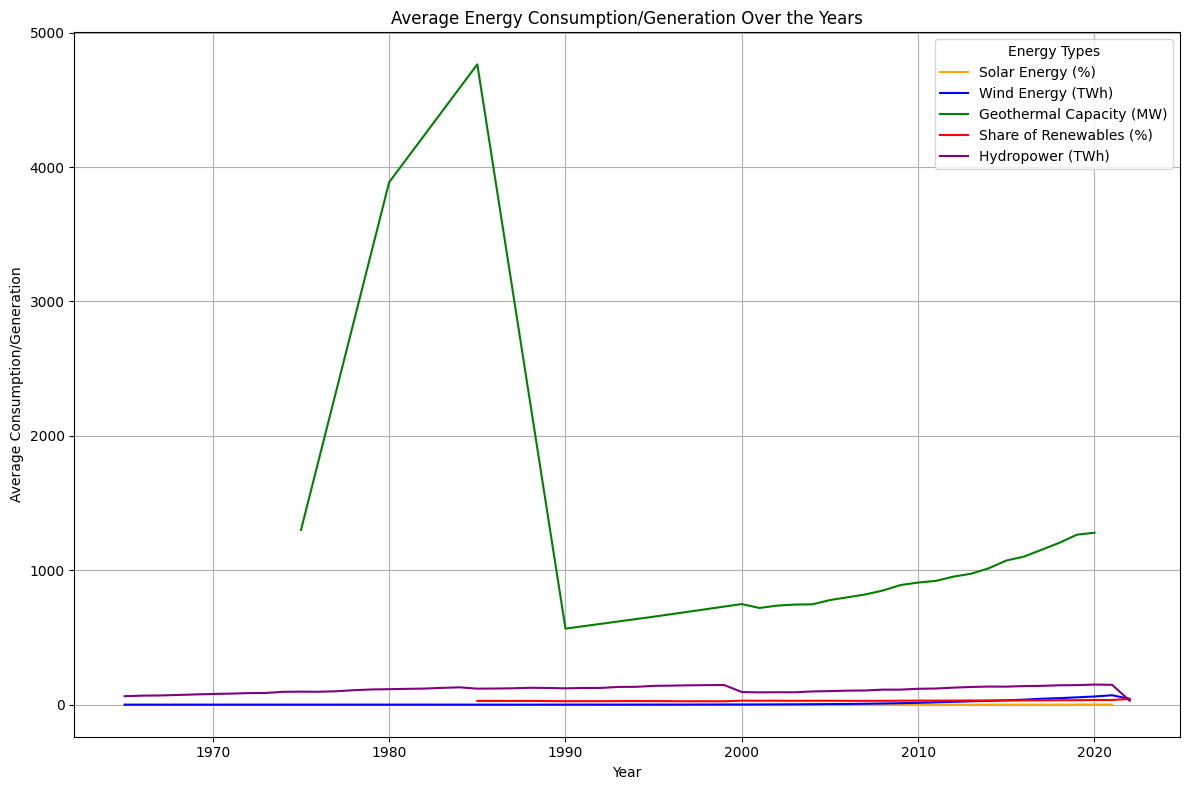

In [ ]:
# Rename columns for easier access
df_solar.rename(columns={'Solar (% equivalent primary energy)': 'solar'}, inplace=True)
df_wind.rename(columns={'Electricity from wind (TWh)': 'wind'}, inplace=True)
df_geothermal.rename(columns={'Geothermal Capacity': 'geothermal'}, inplace=True)
df_share_electricity.rename(columns={'Renewables (% electricity)': 'share_electricity'}, inplace=True)
df_hydro.rename(columns={'Electricity from hydro (TWh)': 'hydro'}, inplace=True)

# Group by 'Year' and calculate the average for each energy source
df_solar_avg = df_solar.groupby('Year')['solar'].mean()
df_wind_avg = df_wind.groupby('Year')['wind'].mean()
df_geothermal_avg = df_geothermal.groupby('Year')['geothermal'].mean()
df_share_electricity_avg = df_share_electricity.groupby('Year')['share_electricity'].mean()
df_hydro_avg = df_hydro.groupby('Year')['hydro'].mean()

# Create the plot
plt.figure(figsize=(12, 8))

# Plot all energy sources on the same graph
plt.plot(df_solar_avg.index, df_solar_avg, label='Solar Energy (%)', color='orange')
plt.plot(df_wind_avg.index, df_wind_avg, label='Wind Energy (TWh)', color='blue')
plt.plot(df_geothermal_avg.index, df_geothermal_avg, label='Geothermal Capacity (MW)', color='green')
plt.plot(df_share_electricity_avg.index, df_share_electricity_avg, label='Share of Renewables (%)', color='red')
plt.plot(df_hydro_avg.index, df_hydro_avg, label='Hydropower (TWh)', color='purple')

# Add labels and title
plt.title('Average Energy Consumption/Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Consumption/Generation')
plt.legend(title='Energy Types')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

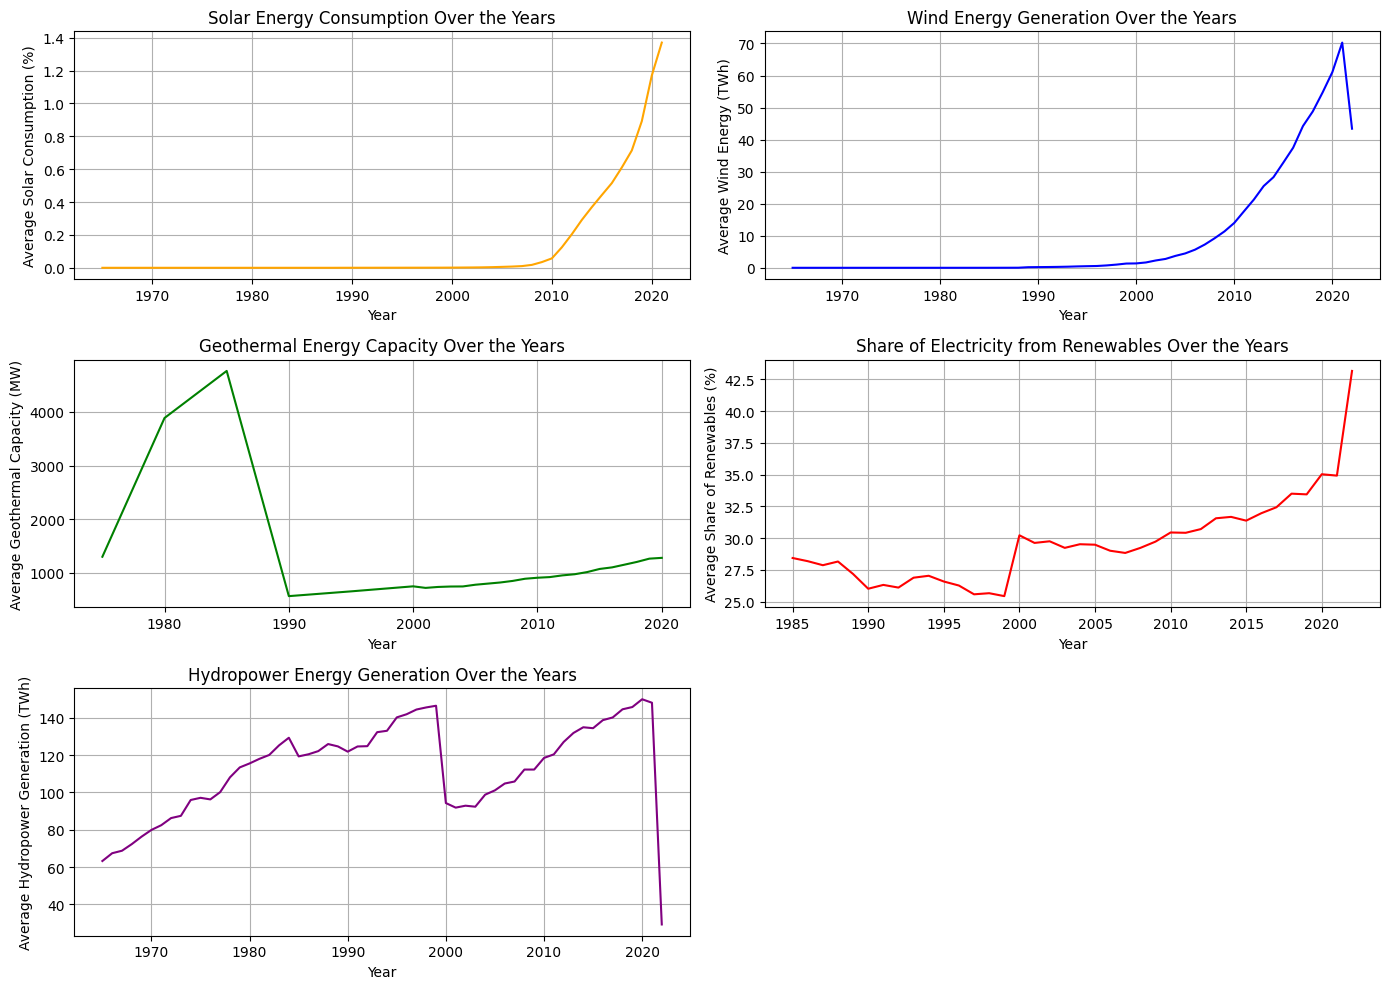

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframes
df_solar = pd.read_csv("solar_energy.csv")
df_wind = pd.read_csv("wind-generation.csv")
df_geothermal = pd.read_csv("installed-geothermal-capacity.csv")
df_share_electricity = pd.read_csv("share-electricity-renewables.csv")
df_hydro = pd.read_csv("hydropower-consumption.csv")

# Rename columns for easier access
df_solar.rename(columns={'Solar (% equivalent primary energy)': 'solar'}, inplace=True)
df_wind.rename(columns={'Electricity from wind (TWh)': 'wind'}, inplace=True)
df_geothermal.rename(columns={'Geothermal Capacity': 'geothermal'}, inplace=True)
df_share_electricity.rename(columns={'Renewables (% electricity)': 'share_electricity'}, inplace=True)
df_hydro.rename(columns={'Electricity from hydro (TWh)': 'hydro'}, inplace=True)

# Group by 'Year' and calculate the average for each energy source
df_solar_avg = df_solar.groupby('Year')['solar'].mean()
df_wind_avg = df_wind.groupby('Year')['wind'].mean()
df_geothermal_avg = df_geothermal.groupby('Year')['geothermal'].mean()
df_share_electricity_avg = df_share_electricity.groupby('Year')['share_electricity'].mean()
df_hydro_avg = df_hydro.groupby('Year')['hydro'].mean()

# Create separate subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Plot Solar Energy
axs[0, 0].plot(df_solar_avg.index, df_solar_avg, label='Solar Energy (%)', color='orange')
axs[0, 0].set_title('Solar Energy Consumption Over the Years')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Solar Consumption (%)')
axs[0, 0].grid(True)

# Plot Wind Energy
axs[0, 1].plot(df_wind_avg.index, df_wind_avg, label='Wind Energy (TWh)', color='blue')
axs[0, 1].set_title('Wind Energy Generation Over the Years')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Wind Energy (TWh)')
axs[0, 1].grid(True)

# Plot Geothermal Energy
axs[1, 0].plot(df_geothermal_avg.index, df_geothermal_avg, label='Geothermal Capacity (MW)', color='green')
axs[1, 0].set_title('Geothermal Energy Capacity Over the Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Geothermal Capacity (MW)')
axs[1, 0].grid(True)

# Plot Share of Electricity from Renewables
axs[1, 1].plot(df_share_electricity_avg.index, df_share_electricity_avg, label='Share of Renewables (%)', color='red')
axs[1, 1].set_title('Share of Electricity from Renewables Over the Years')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Share of Renewables (%)')
axs[1, 1].grid(True)

# Plot Hydropower Energy
axs[2, 0].plot(df_hydro_avg.index, df_hydro_avg, label='Hydropower (TWh)', color='purple')
axs[2, 0].set_title('Hydropower Energy Generation Over the Years')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Hydropower Generation (TWh)')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


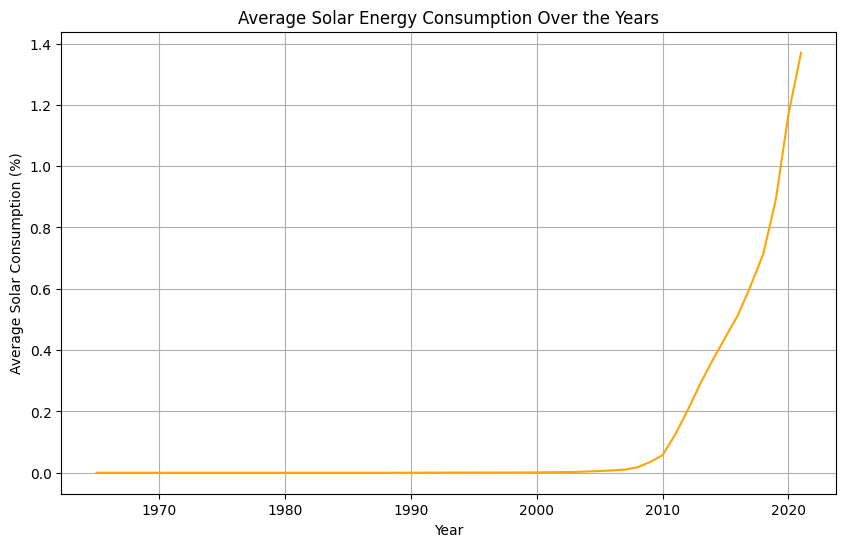

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_solar dataframe
df_solar = pd.read_csv("solar_energy.csv")

# Rename the column for convenience
df_solar.rename(columns={'Solar (% equivalent primary energy)': 'solar'}, inplace=True)

# Group by 'Year' and calculate the average solar consumption
df_solar_avg = df_solar.groupby('Year')['solar'].mean()

# Plot the average solar consumption over the years
plt.figure(figsize=(10, 6))
df_solar_avg.plot(kind='line', color='orange')
plt.title('Average Solar Energy Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Solar Consumption (%)')
plt.grid(True)
plt.show()


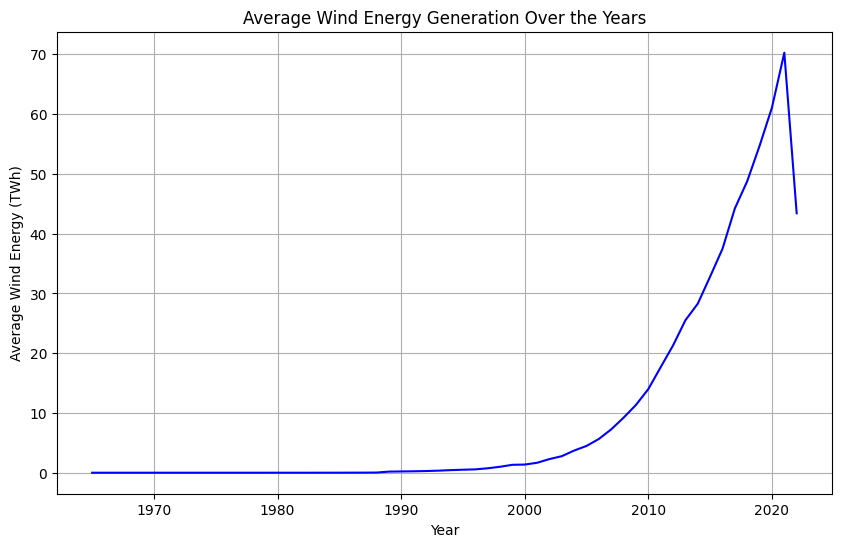

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_wind dataframe
df_wind = pd.read_csv("wind-generation.csv")

# Rename the column for convenience
df_wind.rename(columns={'Electricity from wind (TWh)': 'wind'}, inplace=True)

# Group by 'Year' and calculate the average wind energy generation
df_wind_avg = df_wind.groupby('Year')['wind'].mean()

# Plot the average wind energy generation over the years
plt.figure(figsize=(10, 6))
df_wind_avg.plot(kind='line', color='blue')
plt.title('Average Wind Energy Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Wind Energy (TWh)')
plt.grid(True)
plt.show()


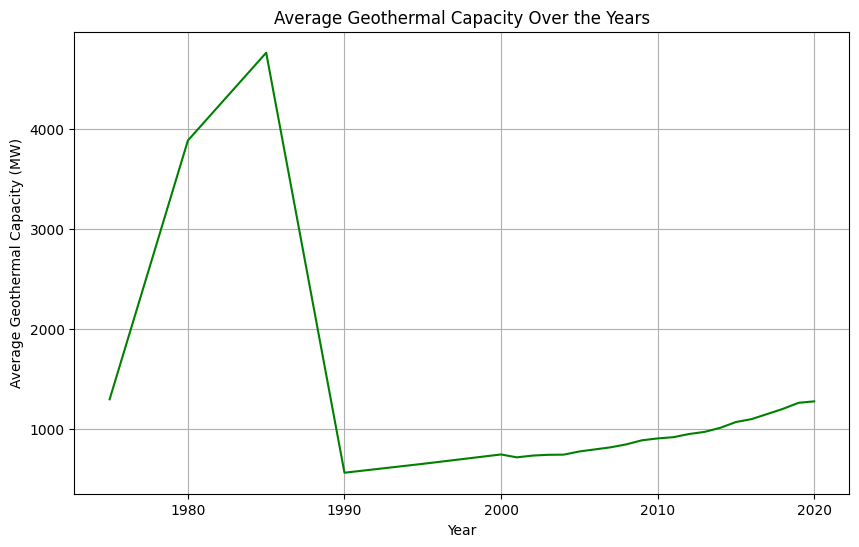

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_geothermal dataframe
df_geothermal = pd.read_csv("installed-geothermal-capacity.csv")

# Rename the column for convenience
df_geothermal.rename(columns={'Geothermal Capacity': 'geothermal'}, inplace=True)

# Group by 'Year' and calculate the average geothermal capacity
df_geothermal_avg = df_geothermal.groupby('Year')['geothermal'].mean()

# Plot the average geothermal energy capacity over the years
plt.figure(figsize=(10, 6))
df_geothermal_avg.plot(kind='line', color='green')
plt.title('Average Geothermal Capacity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Geothermal Capacity (MW)')
plt.grid(True)
plt.show()


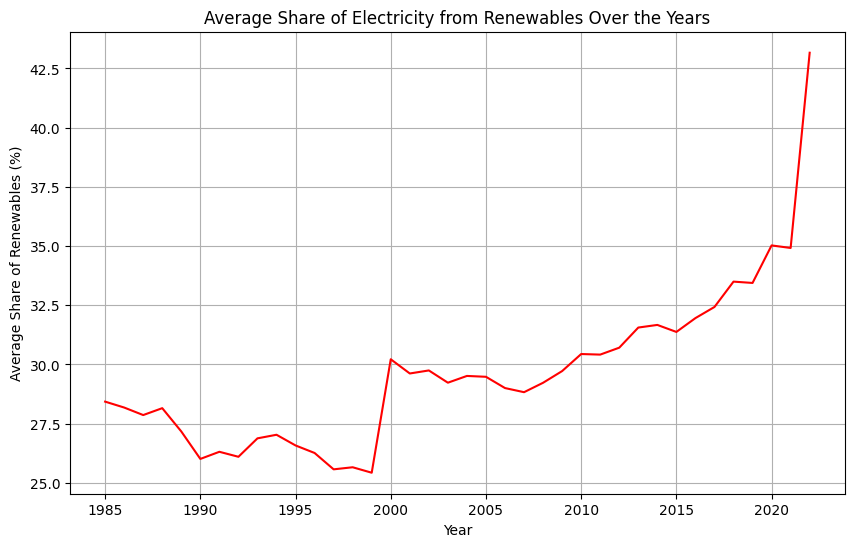

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_share_electricity dataframe
df_share_electricity = pd.read_csv("share-electricity-renewables.csv")

# Rename the column for convenience
df_share_electricity.rename(columns={'Renewables (% electricity)': 'share_electricity'}, inplace=True)

# Group by 'Year' and calculate the average share of renewables
df_share_electricity_avg = df_share_electricity.groupby('Year')['share_electricity'].mean()

# Plot the average share of renewables over the years
plt.figure(figsize=(10, 6))
df_share_electricity_avg.plot(kind='line', color='red')
plt.title('Average Share of Electricity from Renewables Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Share of Renewables (%)')
plt.grid(True)
plt.show()


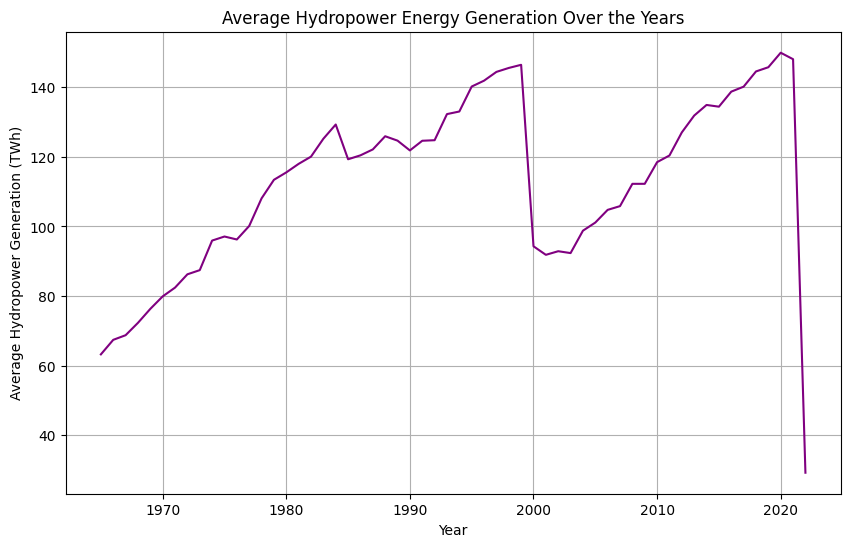

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the df_hydro dataframe
df_hydro = pd.read_csv("hydropower-consumption.csv")

# Rename the column for convenience
df_hydro.rename(columns={'Electricity from hydro (TWh)': 'hydro'}, inplace=True)

# Group by 'Year' and calculate the average hydropower generation
df_hydro_avg = df_hydro.groupby('Year')['hydro'].mean()

# Plot the average hydropower energy generation over the years
plt.figure(figsize=(10, 6))
df_hydro_avg.plot(kind='line', color='purple')
plt.title('Average Hydropower Energy Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Hydropower Generation (TWh)')
plt.grid(True)
plt.show()


# SAARC Countries

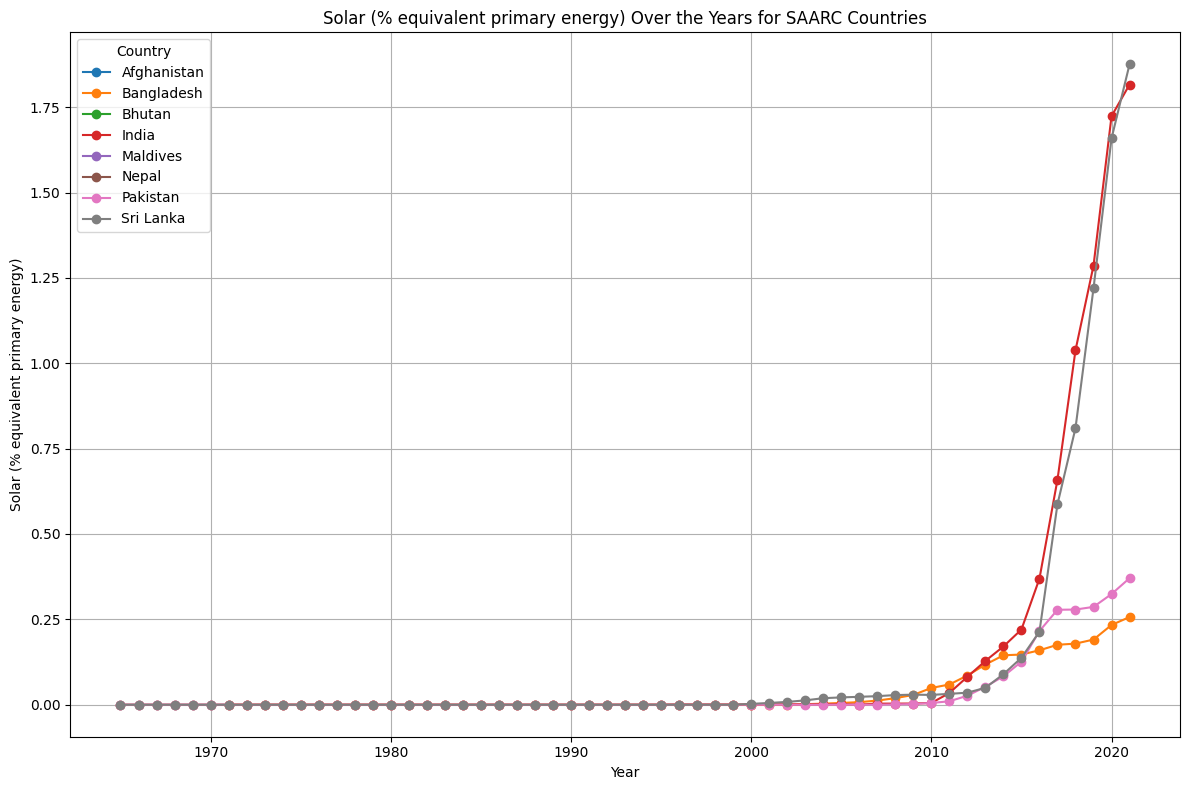

In [ ]:
# Load the df_solar dataframe
df_solar = pd.read_csv("solar_energy.csv")

# List of SAARC countries
saarc_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

# Filter the DataFrame for the SAARC countries
df_saarc = df_solar[df_solar['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc[df_saarc['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Solar (% equivalent primary energy)'], marker='o', label=country)

# Title and labels
plt.title('Solar (% equivalent primary energy) Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Solar (% equivalent primary energy)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

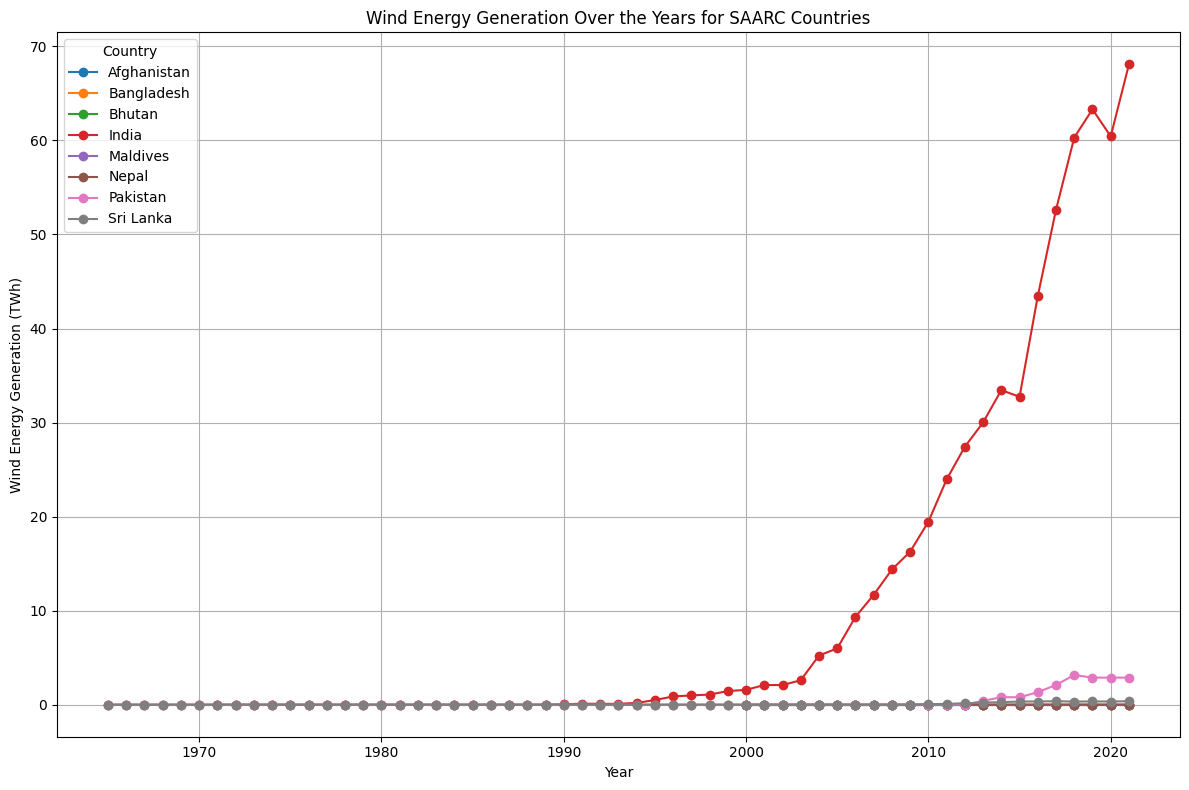

In [ ]:
# Load the df_wind dataframe
df_wind = pd.read_csv("wind-generation.csv")

# Filter the DataFrame for the SAARC countries
df_saarc_wind = df_wind[df_wind['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc_wind[df_saarc_wind['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Electricity from wind (TWh)'], marker='o', label=country)

# Title and labels
plt.title('Wind Energy Generation Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Wind Energy Generation (TWh)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


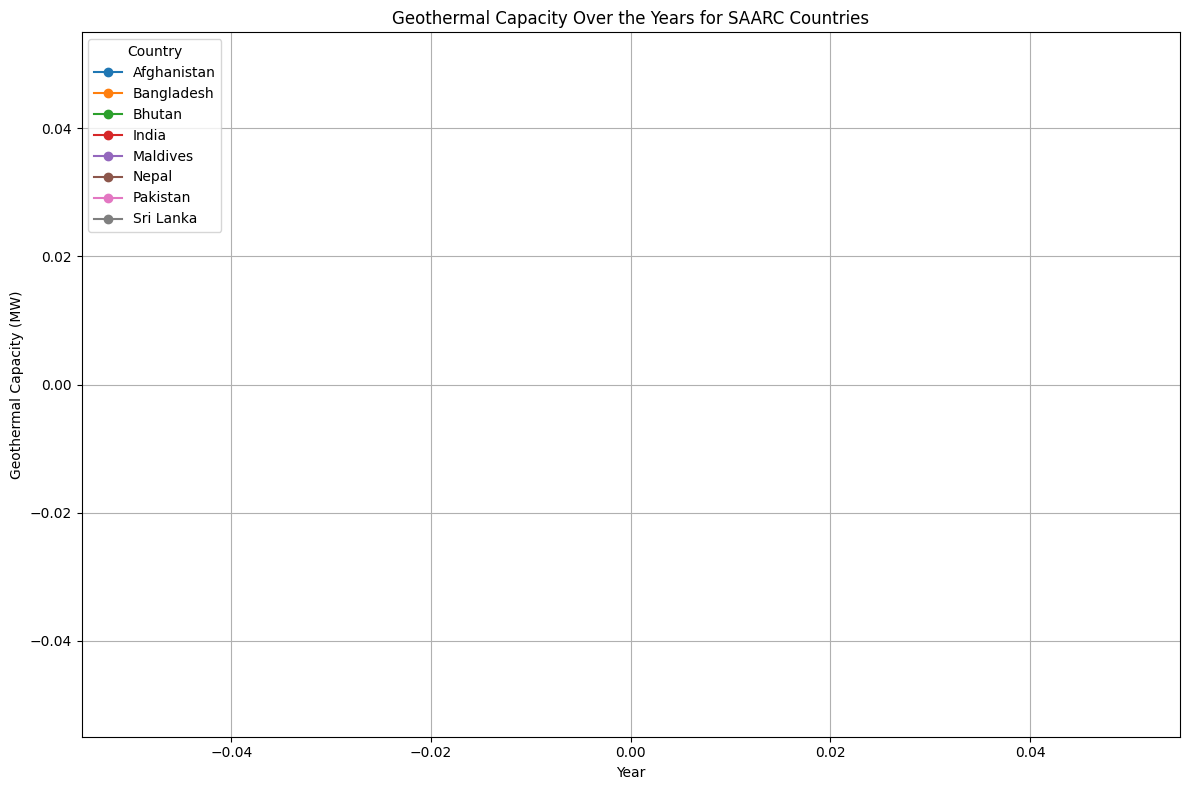

In [ ]:
# Load the df_geothermal dataframe
df_geothermal = pd.read_csv("installed-geothermal-capacity.csv")

# Filter the DataFrame for the SAARC countries
df_saarc_geothermal = df_geothermal[df_geothermal['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc_geothermal[df_saarc_geothermal['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Geothermal Capacity'], marker='o', label=country)

# Title and labels
plt.title('Geothermal Capacity Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Geothermal Capacity (MW)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


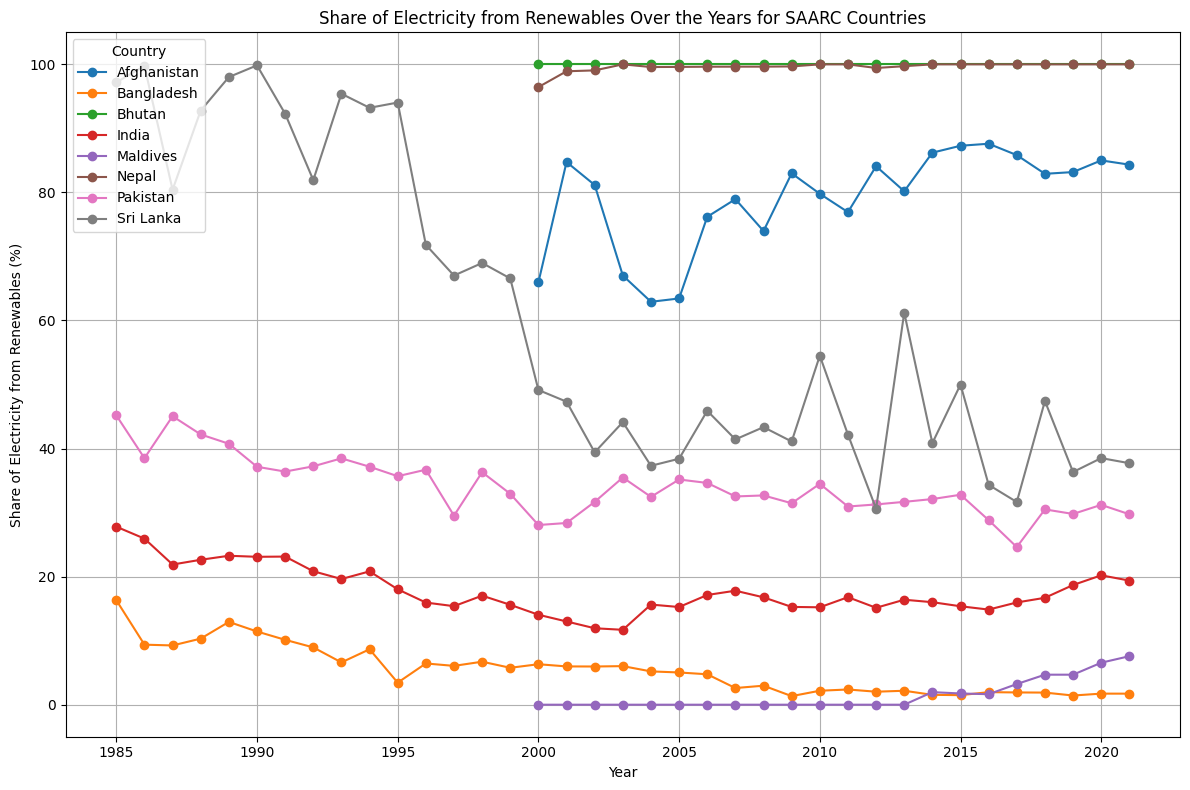

In [ ]:
# Load the df_share_electricity dataframe
df_share_electricity = pd.read_csv("share-electricity-renewables.csv")

# Filter the DataFrame for the SAARC countries
df_saarc_share_electricity = df_share_electricity[df_share_electricity['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc_share_electricity[df_saarc_share_electricity['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% electricity)'], marker='o', label=country)

# Title and labels
plt.title('Share of Electricity from Renewables Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Share of Electricity from Renewables (%)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


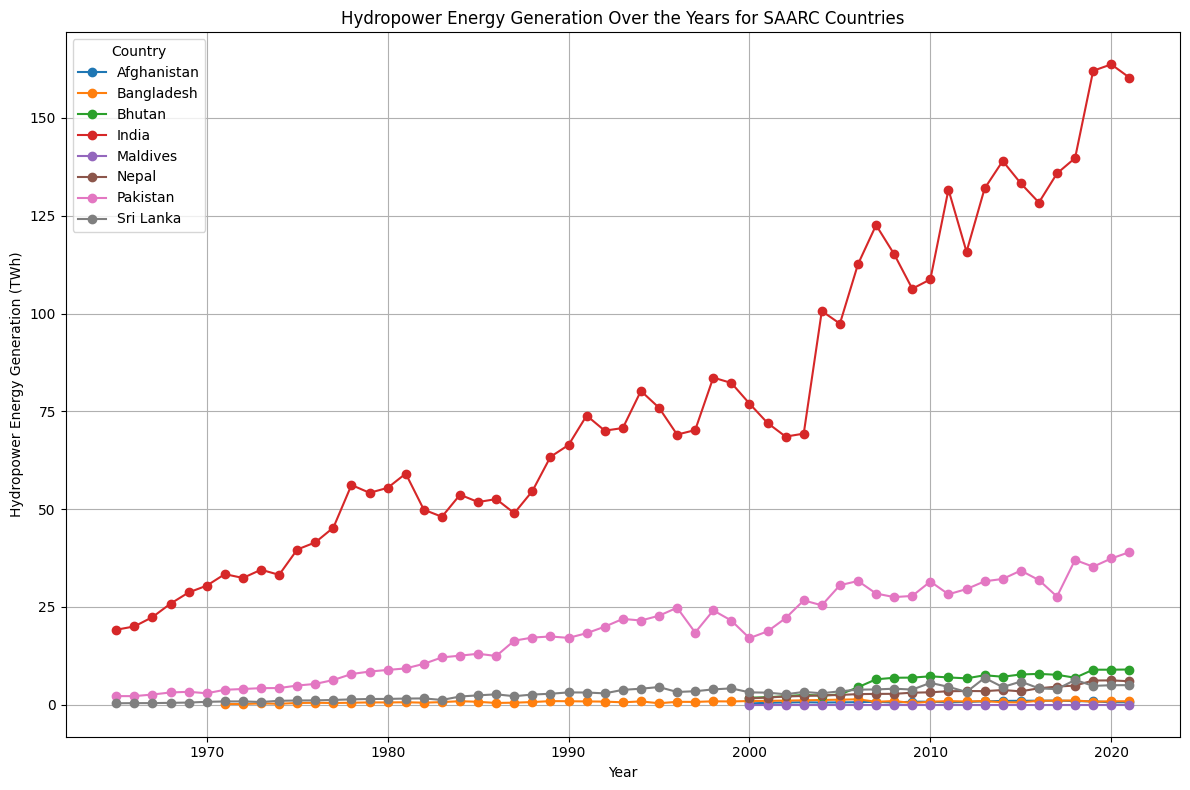

In [ ]:
# Load the df_hydro dataframe
df_hydro = pd.read_csv("hydropower-consumption.csv")

# Filter the DataFrame for the SAARC countries
df_saarc_hydro = df_hydro[df_hydro['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc_hydro[df_saarc_hydro['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Electricity from hydro (TWh)'], marker='o', label=country)

# Title and labels
plt.title('Hydropower Energy Generation Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Hydropower Energy Generation (TWh)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


## Regional **Analysis**

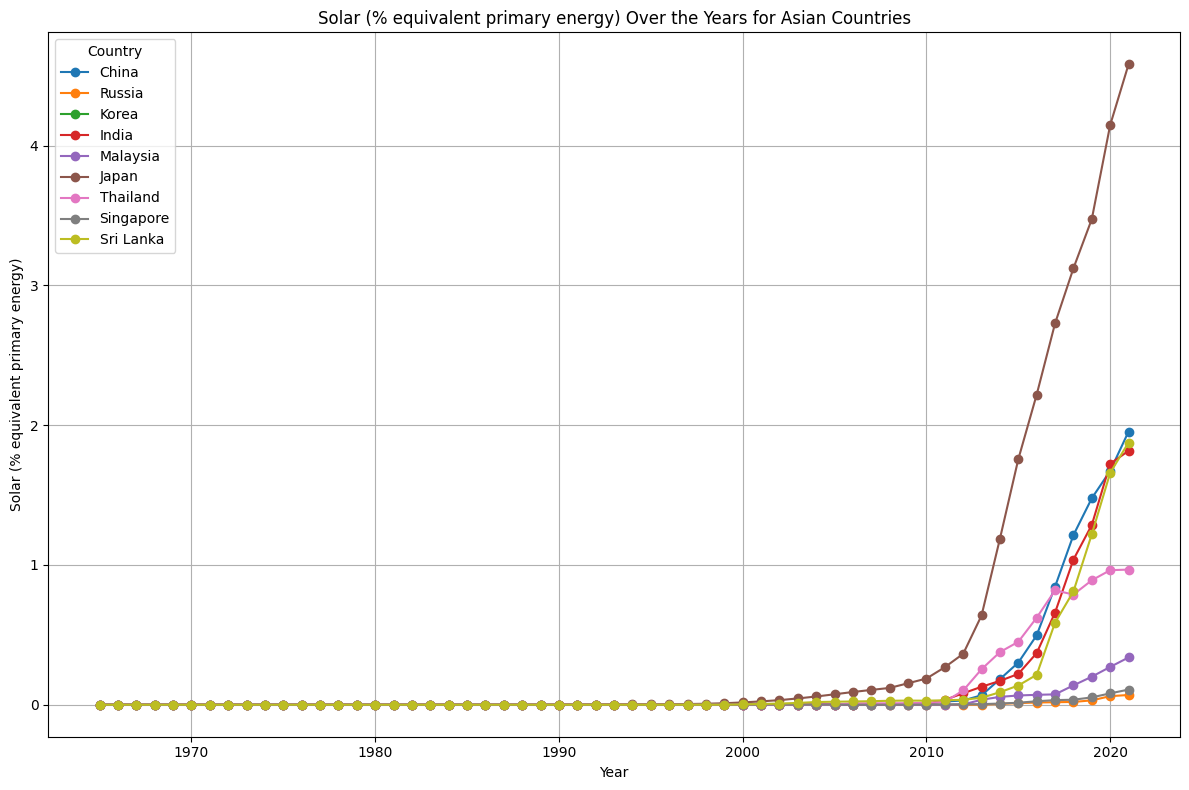

In [ ]:
# Load the df_solar dataframe
df_solar = pd.read_csv("solar_energy.csv")

# List of SAARC countries
countries = [
    'China', 'Russia', 'Korea', 'India', 'Malaysia','Japan',
    'Thailand', 'Singapore', 'Sri Lanka'
]

# Filter the DataFrame for the countries
df_country = df_solar[df_solar['Entity'].isin(countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in countries:
    country_data = df_country[df_country['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Solar (% equivalent primary energy)'], marker='o', label=country)

# Title and labels
plt.title('Solar (% equivalent primary energy) Over the Years for Asian Countries')
plt.xlabel('Year')
plt.ylabel('Solar (% equivalent primary energy)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
df_solar['Entity'].unique()

array(['Africa', 'Africa (BP)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (BP)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (BP)', 'Canada', 'Central America (BP)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (BP)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (BP)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (BP)',
       'Middle East (BP)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (BP)', 'North America', 'North America (BP)',
       'North Macedonia', 'Norway', 'OECD (BP)', 'Oceania', 'Oman',
     

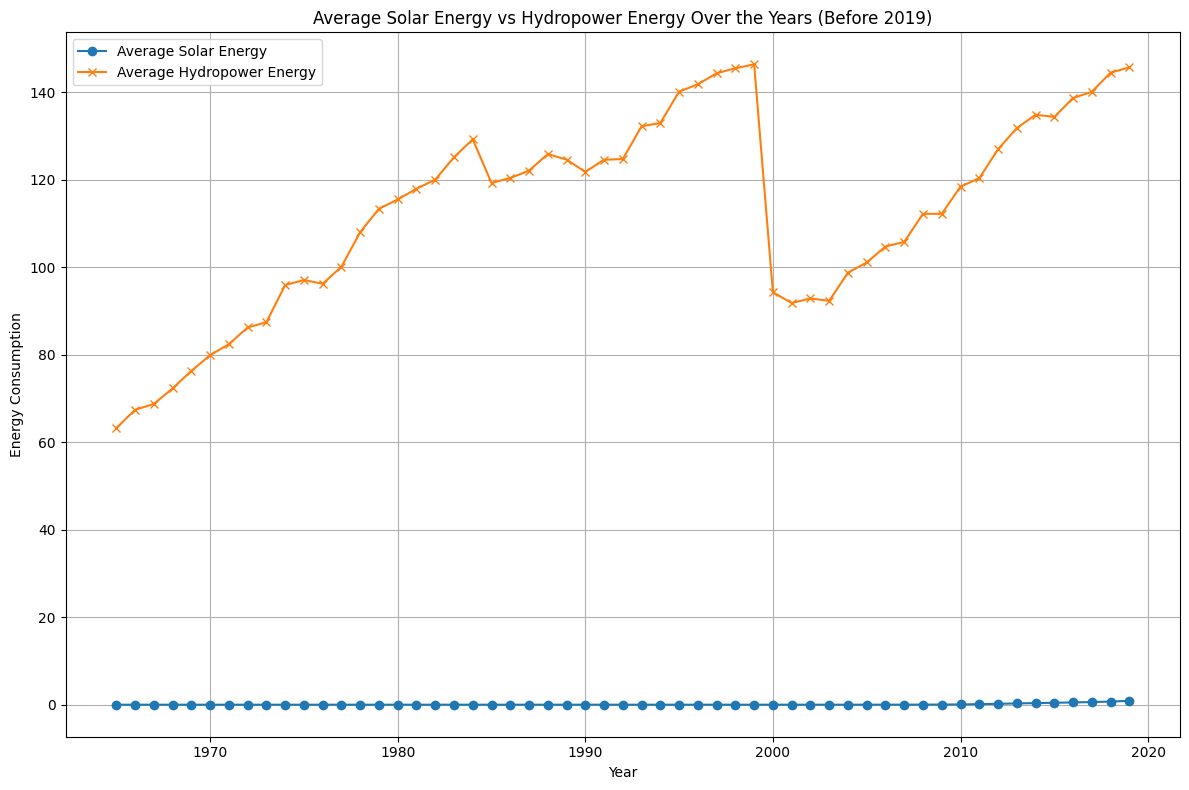

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframes
df_solar = pd.read_csv("solar_energy.csv")
df_hydro = pd.read_csv("hydropower-consumption.csv")

# Filter the data to include only years less than 2019
df_solar_filtered = df_solar[df_solar['Year'] <= 2019]
df_hydro_filtered = df_hydro[df_hydro['Year'] <= 2019]

# Calculate the average for each year across all countries for both solar and hydro
avg_solar = df_solar_filtered.groupby('Year')['Solar (% equivalent primary energy)'].mean()
avg_hydro = df_hydro_filtered.groupby('Year')['Electricity from hydro (TWh)'].mean()

# Plotting Solar vs Hydropower
plt.figure(figsize=(12, 8))

# Plot average solar energy
plt.plot(avg_solar.index, avg_solar, marker='o', label='Average Solar Energy')

# Plot average hydropower energy
plt.plot(avg_hydro.index, avg_hydro, marker='x', label='Average Hydropower Energy')

# Title and labels
plt.title('Average Solar Energy vs Hydropower Energy Over the Years (Before 2019)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

